# Recurrent Neural Network

## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [3]:
# dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# training_set = dataset_train.iloc[:, 1:2].values

In [4]:
# len(dataset_train)

In [5]:
stock_name='SPY'

In [6]:
key = 'LXRAWDV9NCEMH1QL'
ts = TimeSeries(key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol=stock_name,interval='1min', outputsize='full')

In [7]:
data=data.iloc[::-1]

In [8]:
data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-11-02 04:01:00,328.52,328.52,328.40,328.51,7375.0
2020-11-02 04:02:00,328.50,328.50,328.48,328.48,3908.0
2020-11-02 04:03:00,328.50,328.66,328.50,328.60,1064.0
2020-11-02 04:04:00,328.79,328.87,328.79,328.85,1751.0
2020-11-02 04:05:00,328.91,329.03,328.91,329.03,1472.0
...,...,...,...,...,...
2020-11-13 19:54:00,358.26,358.26,358.25,358.25,4793.0
2020-11-13 19:56:00,358.30,358.30,358.30,358.30,1498.0
2020-11-13 19:57:00,358.34,358.35,358.34,358.35,3220.0


In [9]:
len(data.iloc[:,0:1].values)

9007

In [10]:
Keep_Days=100
training_set=data.iloc[:-Keep_Days,0:1].values
len(training_set)

8907

### Feature Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with n timesteps and 1 output

In [12]:
n=100

In [13]:
X_train = []
y_train = []
for i in range(n, len(training_set)):
    X_train.append(training_set_scaled[i-n:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Building and Training the RNN

### Importing the Keras libraries and packages

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [16]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [17]:
regressor.add(LSTM(units = 90, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [18]:
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [19]:
regressor.add(LSTM(units = 70, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [20]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [21]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [22]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [23]:
regressor.fit(X_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
276/276 [==============================] - 65s 236ms/step - loss: 0.0078
Epoch 2/20
276/276 [==============================] - 70s 255ms/step - loss: 0.0029
Epoch 3/20
276/276 [==============================] - 71s 258ms/step - loss: 0.0025
Epoch 4/20
276/276 [==============================] - 72s 261ms/step - loss: 0.0022
Epoch 5/20
276/276 [==============================] - 73s 263ms/step - loss: 0.0018
Epoch 6/20
276/276 [==============================] - 73s 265ms/step - loss: 0.0017
Epoch 7/20
276/276 [==============================] - 74s 267ms/step - loss: 0.0015
Epoch 8/20
276/276 [==============================] - 73s 264ms/step - loss: 0.0013
Epoch 9/20
276/276 [==============================] - 72s 260ms/step - loss: 0.0013
Epoch 10/20
276/276 [==============================] - 72s 260ms/step - loss: 0.0011
Epoch 11/20
276/276 [==============================] - 72s 260ms/step - loss: 0.0010
Epoch 12/20
276/276 [==============================] - 72s 262ms/step - lo

## Making the predictions and visualising the results

In [24]:
real_stock_price = data.iloc[-Keep_Days:, 0:1].values

In [25]:
len(real_stock_price)

100

### Getting the predicted stock price

In [26]:
#dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = data.iloc[len(data)- len(real_stock_price) -n:,0:1].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(n, n+len(real_stock_price)):
    X_test.append(inputs[i-n:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [27]:
X_test.shape

(100, 100, 1)

### Visualising the results

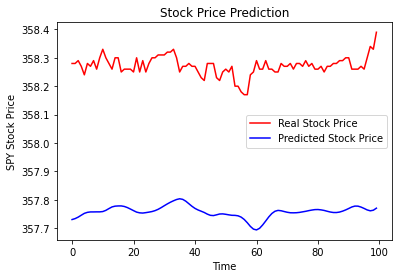

In [28]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(stock_name+' Stock Price')
plt.legend()
plt.show()